# Saugata Ghosh
### November 2,2016


This ipython notebook contains the code for the exploration of the Titanic dataset, a project submitted as part of the Udacity Data Analyst nanodegree program. Specifically we explore which variables in the dataset might have a bearing on whether or not a passenger would survive the disaster. It is important to note that no statistical test or machine learning algorithm has been used to support the exploratory findings, which should therefore be taken as tentative at best.

### Background

One could hypothesize from stories of the Titanic's sinking that a passenger's survival was heavily dependent upon two factors: 1. Recognition of the possibility that the ship could sink 2. Access to a lifeboat

According to Wikipedia, the Titanic reportedly struck an iceberg at 11:40 pm ship's time. The majority of its 2,224 passengers and crew had likely retired to their respective cabins for the evening by that time. Those on the upper decks had a shorter journey to the lifeboats, and possibly access to more timely and accurate information about the impending threat. Thus, any data relating to one's location on the ship could prove helpful to survival predictions. 

The Titanic was designed to carry 32 lifeboats, but this number was reduced to 20 (enough for about 1,180 people) for its maiden voyage -- likely a cost-cutting measure influenced by perceptions that the additional boats would clutter the deck of a ship deemed "unsinkable." Given that constraint, it is not surprising that a disproportionate number of men were apparently left aboard because of a 'women and children first' protocol followed by some of the officers overseeing the loading of lifeboats with passengers. Hence age and gender of the passengers were also variables likely to influence their chances of survival. 

Thus the two broad questions we ask and try to answer are:

a) How far was the evacuation policy followed likely to affect the chances of survival?

b) How was the location of a passenger on the ship (and hence recognition of the possibility of a disaster) likely to affect chance of survival?

In [35]:
#Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
#Import the Titanic dataset and explore the first few rows

titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
#Summary sstatistics for numerical variables
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The following are some observations from the above summary:

a) There are 891 passengers in the dataset, 38% of whom survived

b)The Pclass variable is really categorical and should be treated as such

c) The average age of the passengers was 29.6 years with the oldest passenger being 80 years old and the youngest less than a year old

d) The maximum number of siblings and spouses a passenger had was 8 while the maximum number of parents and children a passenger had was 6.



In [130]:
#Let us now examine the frequency distribution for three categorical variables, Pclass, Sex and Port of Embarkation
print titanic_df['Sex'].value_counts()
print titanic_df['Pclass'].value_counts()
print titanic_df['Embarked'].value_counts()

male      577
female    314
Name: Sex, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


The following are evident :

a) There were more males than females aboard the Titanic

b) The largest number of passengers were in the 3rd class, followed by 2nd and 1st

c) Most passengers embarked at Southampton, followed by Cherbourg and Queenstown

In [39]:
#Examine the percentage of missing values in the variables
titanic_df.apply(lambda x: sum(x.isnull())*100/float(len(x)),axis = 0)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

We can see that about 20% of the Age variable are missing and about 77% of the Cabin variable are missing. For the purpose of this analysis we will impute values for the Age and Embarked variables and ignore the following variables because they might not be relevant to the analysis - PassengerId, Ticket. The Cabin variable has too many missing values but we will see if some meaningful data transformation allows us to use this variable.We will ignore Fare paid in the analysis as Fare and Pclass should be highly correlated and Pclass alone should provide an adequate proxy for the socio-economic classes the passengers belonged to and therefore their possible location aboard the ship.

## Imputing missing variables : Age, Embarked & Cabin

We will impute missing values for Age based on the median age of passengers grouped as per the passenger class they were in and their titles. The titles will give an idea of both the sex and age of the passengers. The passenger class information will further help us impute value correctly for wealthier (and potentially older) individuals. For this we will first extract the titles from the Name column in the dataset.

In [40]:
titanic_df['Title'] = titanic_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
titanic_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: Title, dtype: int64

Next we wish to reduce the different titles to four categories : Mr, Mrs, Miss and Master. For this we create an appropriate function and apply it to the Title column.

In [41]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
titanic_df['Title']=titanic_df.apply(replace_titles, axis=1)
titanic_df['Title'].value_counts()

Mr        531
Miss      185
Mrs       135
Master     40
Name: Title, dtype: int64

Now that we have reduced the list of titles to four categories we will impute missing ages in each category (passenger class and title) with the median age for that category as given below

In [42]:
titanic_df.groupby(['Pclass','Title'])['Age'].median()


Pclass  Title 
1       Master     4.0
        Miss      30.0
        Mr        42.0
        Mrs       43.0
2       Master     1.0
        Miss      24.0
        Mr        31.0
        Mrs       32.0
3       Master     4.0
        Miss      18.0
        Mr        26.0
        Mrs       31.0
Name: Age, dtype: float64

In [43]:
def fillAges(row):
        if row['Pclass']== 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 43
            elif row['Title'] == 'Mr':
                return 42
            elif row['Title'] == 'Master':
                return 4
        elif row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 24
            elif row['Title'] == 'Mrs':
                return 32
            elif row['Title'] == 'Mr':
                return 31
            elif row['Title'] == 'Master':
                return 1
        elif row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31
            elif row['Title'] == 'Mr':
                return 26
            elif row['Title'] == 'Master':
                return 4
titanic_df.Age = titanic_df.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)

In [44]:
# We impute missing values in the Embarked column with the most frequent value in the column
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].value_counts().index[0])

In [53]:
#For the Cabin variable we replace the missing values with 'U' (for Unknown) and map each type of cabin to its first letter

# replacing missing cabins with U (for Unknown)
titanic_df.Cabin.fillna('U',inplace=True)
    
# mapping each Cabin value with the cabin letter
titanic_df['Cabin'] = titanic_df['Cabin'].map(lambda c : c[0])

pd.crosstab(index = titanic_df['Pclass'], columns = titanic_df['Cabin'])

Cabin,A,B,C,D,E,F,G,T,U
Pclass,,,,,,,,,
1,15,47,59,29,25,0,0,1,40
2,0,0,0,4,4,8,0,0,168
3,0,0,0,0,3,5,4,0,479


We observe from the above that the majority of passengers with known cabin assignments were in the first class

In [46]:
titanic_df.apply(lambda x: sum(x.isnull())*100/float(len(x)),axis = 0)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
Title          0.0
dtype: float64

We see that the missing values have been dealt with for all variables of interest

## Creating new variables : Categorical Age and Family Size 

We create a variable Categorical Age to specifically distinguish between Child and Adult, to see if children had a better chance of survival



In [47]:
# Creating Categorized Age variable

titanic_df['Categorized_Age'] = titanic_df['Age'].apply(lambda x: "Child" if x <= 10 else "Adult")


We also create a variable Family Size, that adds the variables Parch and SibSp to the passenger to determine how large a family the passenger had, as this could possibly have a bearing on chances of survival. We also introduce the feature Categorized Family Size, binning the Family Size variable into three categories.

In [49]:
#Creating Family Size variable

titanic_df['Family_Size'] = titanic_df['Parch']+titanic_df['SibSp']+1

#Creating Categorized Family Size variable

bins = [0,1,4,11]
group_names = ['Singleton', 'SmallFamily', 'LargeFamily']

titanic_df['Categorized_Family'] = pd.cut(titanic_df['Family_Size'], bins, labels = group_names)



In [51]:
titanic_df['Categorized_Family'].value_counts()

Singleton      537
SmallFamily    292
LargeFamily     62
dtype: int64

We observe that the majority of the passengers on board were single and relatively few were travelling with large families

## Identifying likely predictors of survival ('Women and Children First!')

Since as per our hypothesis the evacuation of passengers followed a 'Women and Children First' policy, we first examine if the data suggests that that was indeed the case.

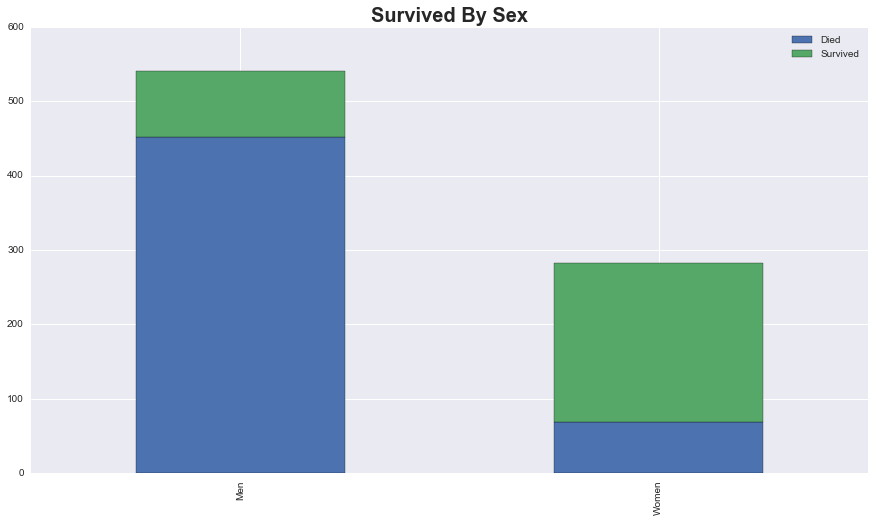

In [91]:
# Subsetting only for adults and examining survival 
titanic_adult = titanic_df[titanic_df['Categorized_Age'] == 'Adult']

male = titanic_adult[titanic_adult['Sex'] == 'male']['Survived'].value_counts()
female = titanic_adult[titanic_adult['Sex'] == 'female']['Survived'].value_counts()
df = pd.DataFrame([male, female])
df.index = ['Men', 'Women']
df.plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.title('Survived By Sex', fontsize = 20, weight = 'bold')
plt.legend(['Died', 'Survived'])

In [88]:
titanic_adult.groupby(["Sex"])["Survived"].value_counts()




Sex     Survived
female  1           214
        0            69
male    0           452
        1            88
dtype: int64

From the above graph it is clear that while majority (76 %) of women survived, an overwhelming majority (84%) of men died. 

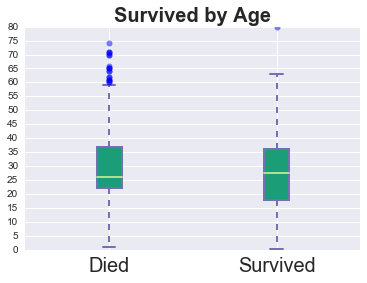

In [129]:
#Examining Age distribution of those who died and those who survived

survived = titanic_df[titanic_df['Survived']== 1]['Age']
died = titanic_df[titanic_df['Survived'] == 0]['Age']

data_to_plot = [died, survived]
bp = plt.boxplot(data_to_plot,patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.xticks([1,2],['Died', 'Survived'], fontsize=20)
plt.yticks(np.arange(0,85,5))
plt.title("Survived by Age", fontsize=20, weight='bold')


From the box plots there does not appear to be much difference in the overall age distrbutions of those who died and those who survived.

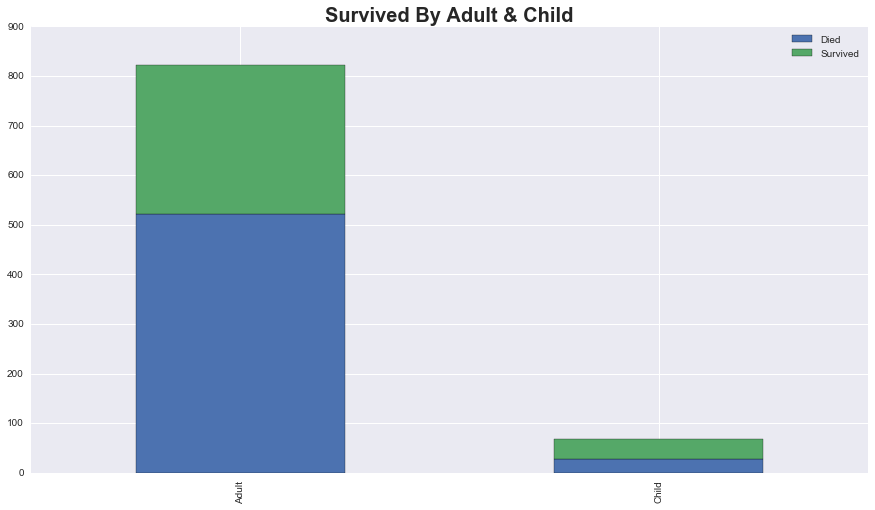

In [94]:
#Examining surivival for adults and children
child = titanic_df[titanic_df['Categorized_Age'] == 'Child']['Survived'].value_counts()
adult = titanic_df[titanic_df['Categorized_Age'] == 'Adult']['Survived'].value_counts()
df = pd.DataFrame([adult, child])
df.index = ['Adult', 'Child']
df.plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.title('Survived By Adult & Child', fontsize = 20, weight = 'bold')
plt.legend(['Died', 'Survived'])

In [95]:
titanic_df.groupby(["Categorized_Age"])["Survived"].value_counts()

Categorized_Age  Survived
Adult            0           521
                 1           302
Child            1            40
                 0            28
dtype: int64

From the above graph it is evident that while majority(63%) of adults died, 58% of children survived

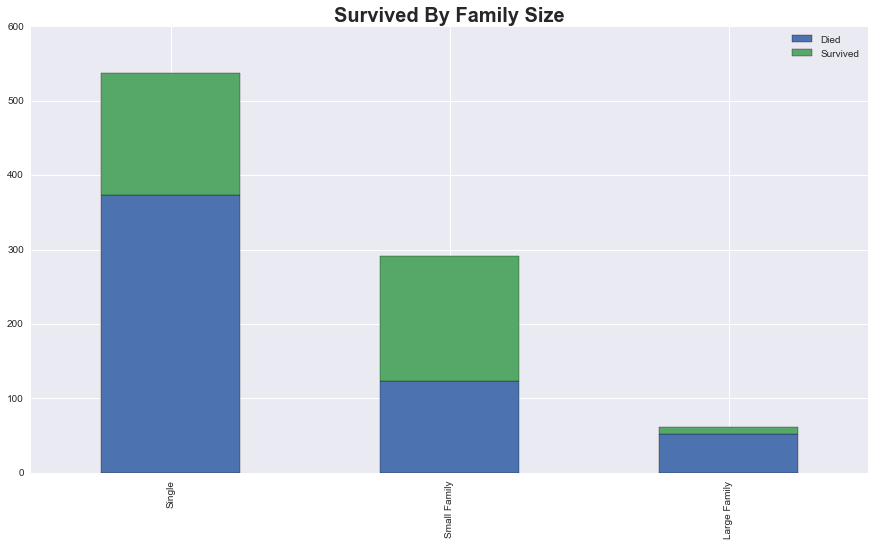

In [96]:
#We examine the effect of family size on chances of survival
single = titanic_df[titanic_df['Categorized_Family'] == 'Singleton']['Survived'].value_counts()
small = titanic_df[titanic_df['Categorized_Family'] == 'SmallFamily']['Survived'].value_counts()
large = titanic_df[titanic_df['Categorized_Family'] == 'LargeFamily']['Survived'].value_counts()
df = pd.DataFrame([single, small, large])
df.index = ['Single', 'Small Family', 'Large Family']
df.plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.title('Survived By Family Size', fontsize = 20, weight = 'bold')
plt.legend(['Died', 'Survived'])


In [97]:
titanic_df.groupby(["Categorized_Family"])["Survived"].value_counts()

Categorized_Family  Survived
Singleton           0           374
                    1           163
SmallFamily         1           169
                    0           123
LargeFamily         0            52
                    1            10
dtype: int64

From the above it is clear that while majority (69%) of single people died, about 58 % of those with small families survived. For people with large families however, only 16 % survived. Thus we can conclude that gender, age and family size were variables that could have had a bearing on chances of survival.

## Identifying likely predictors of survival (Proximity to lifeboats)

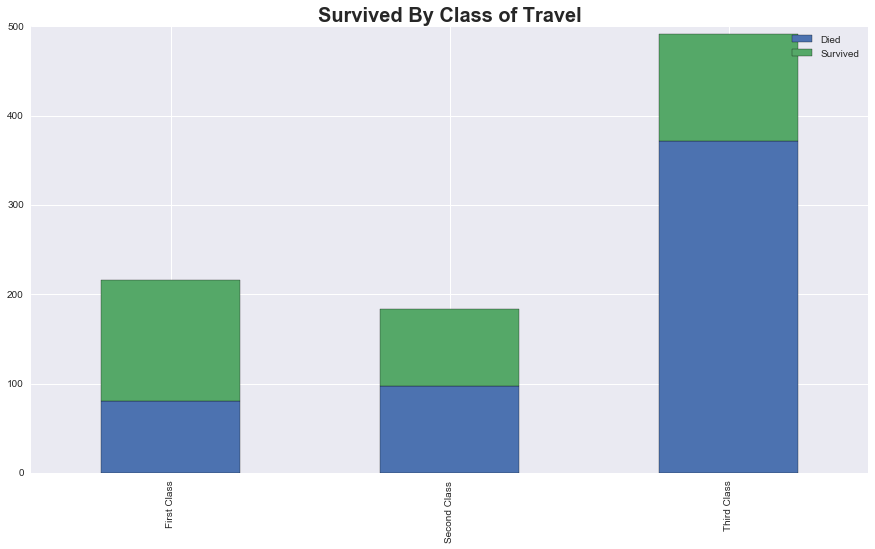

In [98]:
# We examine if the class of travel could have affected chances of survival
one = titanic_df[titanic_df['Pclass'] == 1]['Survived'].value_counts()
two = titanic_df[titanic_df['Pclass'] == 2]['Survived'].value_counts()
three = titanic_df[titanic_df['Pclass'] == 3]['Survived'].value_counts()
df = pd.DataFrame([one, two, three])
df.index = ['First Class', 'Second Class', 'Third Class']
df.plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.title('Survived By Class of Travel', fontsize = 20, weight = 'bold')
plt.legend(['Died', 'Survived'])


In [99]:
titanic_df.groupby(["Pclass"])["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

From the above it appears that the class of travel (and hence proximity to lifeboats) could have had a bearing on chances of survival. About 63% of those travelling in First Class survived. About 47% of those in Second Class survived. Only 24 % of those in Third Class survived.  

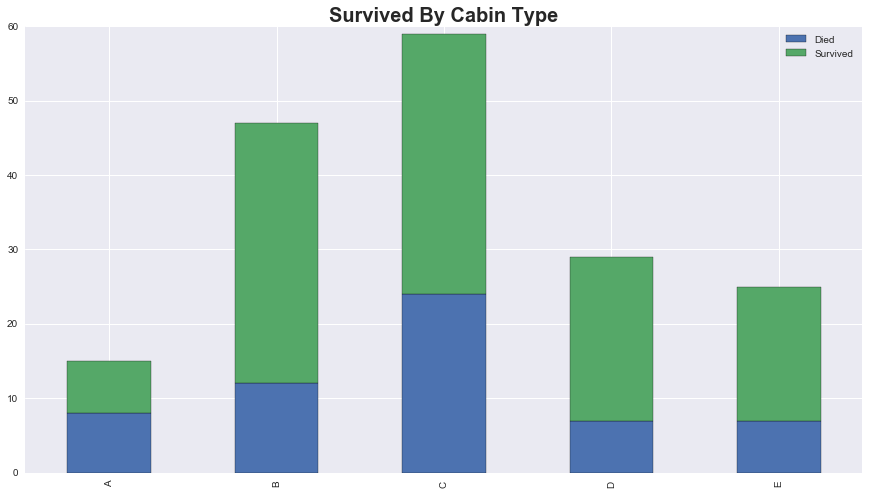

In [100]:
# Only for passengers in First Class we see if the type of Cabin they were in could have impacted chances of survival
titanic_first = titanic_df[titanic_df['Pclass'] == 1]

a = titanic_first[titanic_first['Cabin'] == 'A']['Survived'].value_counts()
b = titanic_first[titanic_first['Cabin'] == 'B']['Survived'].value_counts()
c = titanic_first[titanic_first['Cabin'] == 'C']['Survived'].value_counts()
d = titanic_first[titanic_first['Cabin'] == 'D']['Survived'].value_counts()
e = titanic_first[titanic_first['Cabin'] == 'E']['Survived'].value_counts()
df = pd.DataFrame([a, b, c, d, e])
df.index = ['A', 'B', 'C', 'D', 'E']
df.plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.title('Survived By Cabin Type', fontsize = 20, weight = 'bold')
plt.legend(['Died', 'Survived'])

We sse that except for Cabin Type 'A', passengers in all other types of cabins had a very good chance of surviving. 

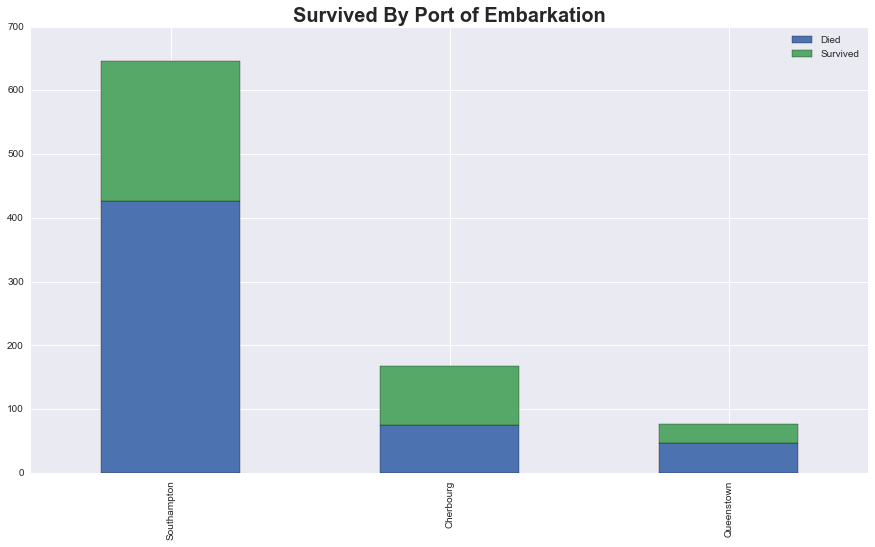

In [101]:
#We see if the port of embarkation could have had a bearing on location on the ship and hence chances of survival.

south = titanic_df[titanic_df['Embarked'] == 'S']['Survived'].value_counts()
cher = titanic_df[titanic_df['Embarked'] == 'C']['Survived'].value_counts()
queens = titanic_df[titanic_df['Embarked'] == 'Q']['Survived'].value_counts()
df = pd.DataFrame([south, cher, queens])
df.index = ['Southampton', 'Cherbourg', 'Queenstown']
df.plot(kind = 'bar', stacked = True, figsize = (15,8))
plt.title('Survived By Port of Embarkation', fontsize = 20, weight = 'bold')
plt.legend(['Died', 'Survived'])

In [102]:
titanic_df.groupby(["Embarked"])["Survived"].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

Interestingly we see that 55 % of the people who embarked at Cherbourg survived while the majority of those who boarded at Southampton or Queenstown perished. Thus we can conclude that there were factors that affected access to a lifeboat and hence chances of survival. People travelling in First Class had a better chance of survival than people travelling in other classes, though here people travelling in Cabin Type A appear to have been at a disadvantage. Passengers who embarked at Cherbourg possibly had a better chance of survival than people who embarked at other ports. 

## Finally a look at the interaction between the Passenger Class and Sex variables to see if chances of survival differ between adult men and women when segmented by Pclass

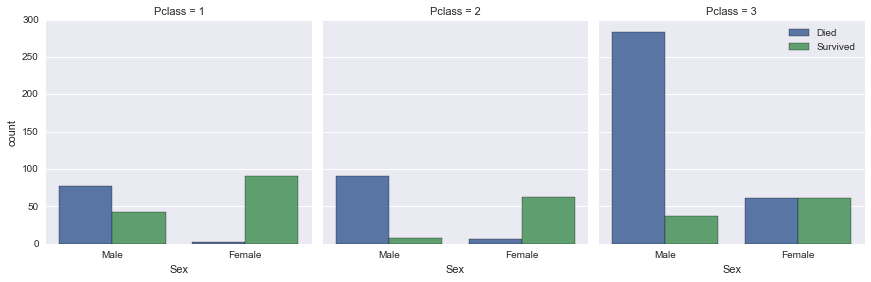

In [124]:
titanic_adult = titanic_df[titanic_df['Categorized_Age'] == 'Adult']
g = sns.factorplot(x = "Sex", hue = "Survived", col = "Pclass", data = titanic_adult, kind = 'count', legend = False)
(g.set_xticklabels(["Male", 'Female']))
plt.legend(["Died", "Survived"])




It is clear for the above that while women in First and Second Classes had a very good chance of survival, for women in the Third Class chance of survival was about 50: 50. Men in First Class stood a disproportionately better chance of surviving than men in other classes. 

### This completes our exploratory analysis of variables that could have had an effect on chances of survival aboard the Titanic.

Sources : Wikipedia, Kaggle Titanic Competition